In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/data.csv",encoding="latin1")

In [5]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
x = df["no2"].dropna().values

In [7]:
r = 102317219

a_r = 0.05 * (r % 7)
b_r = 0.3 * (r % 5 + 1)

z = x + a_r * np.sin(b_r * x)

In [8]:
mu = np.mean(z)
sigma2 = np.var(z)
lam = 1 / (2 * sigma2)
c = np.sqrt(lam / np.pi)

In [9]:
print("Learned Parameters:")
print(f"mu     = {mu:.5f}")
print(f"lambda = {lam:.5f}")
print(f"c      = {c:.5f}")


Learned Parameters:
mu     = 21.48110
lambda = 0.00342
c      = 0.03298


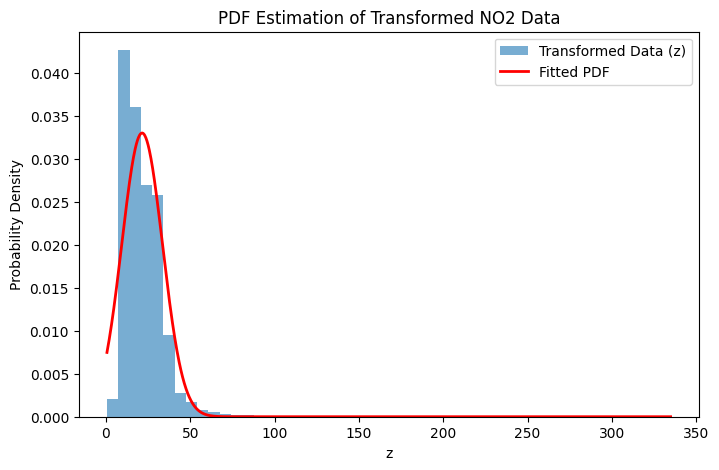

In [12]:
z_range = np.linspace(min(z), max(z), 1000)
pdf = c * np.exp(-lam * (z_range - mu)**2)

plt.figure(figsize=(8,5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Transformed Data (z)")
plt.plot(z_range, pdf, 'r', linewidth=2, label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.title("PDF Estimation of Transformed NO2 Data")
plt.show()